In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.shape

(891, 12)

In [6]:
df = df.drop(['Name','PassengerId','Cabin','Ticket'], axis =1)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:

from sklearn.impute import SimpleImputer

In [9]:
#Data filling with mean (mean) is used to continous values
mean_imputer = SimpleImputer(strategy ='mean')
df['Age'] = mean_imputer.fit_transform(df[['Age']])

In [10]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [11]:
#Data filling with (most_frequent) is used in the categorical values
mf_imputer =SimpleImputer(strategy ='most_frequent')
df['Embarked']= mf_imputer.fit_transform(df[['Embarked']])

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
#transformation
import numpy as np
bins =np.arange(0,82,10)

In [14]:
df['AgeBucket'] = pd.cut(df.Age, bins=bins)

In [15]:
df.drop('Age',axis=1, inplace =True)

In [16]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeBucket
0,0,3,male,1,0,7.2500,S,"(20, 30]"
1,1,1,female,1,0,71.2833,C,"(30, 40]"
2,1,3,female,0,0,7.9250,S,"(20, 30]"
3,1,1,female,1,0,53.1000,S,"(30, 40]"
4,0,3,male,0,0,8.0500,S,"(30, 40]"
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,"(20, 30]"
887,1,1,female,0,0,30.0000,S,"(10, 20]"
888,0,3,female,1,2,23.4500,S,"(20, 30]"
889,1,1,male,0,0,30.0000,C,"(20, 30]"


In [17]:
#OnehotEncoder

In [18]:
df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked','AgeBucket'])

In [19]:
df

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,"AgeBucket_(0, 10]","AgeBucket_(10, 20]","AgeBucket_(20, 30]","AgeBucket_(30, 40]","AgeBucket_(40, 50]","AgeBucket_(50, 60]","AgeBucket_(60, 70]","AgeBucket_(70, 80]"
0,0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0
887,1,0,0,30.0000,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
888,0,1,2,23.4500,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
889,1,0,0,30.0000,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0


In [20]:
#Splitting
from sklearn.model_selection import train_test_split

In [21]:
y=df.Survived

In [22]:
x= df.drop('Survived',axis=1)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=32)

In [24]:
x_train

,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,"AgeBucket_(0, 10]","AgeBucket_(10, 20]","AgeBucket_(20, 30]","AgeBucket_(30, 40]","AgeBucket_(40, 50]","AgeBucket_(50, 60]","AgeBucket_(60, 70]","AgeBucket_(70, 80]"
293,0,0,8.8500,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
617,1,0,16.1000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
424,1,1,20.2125,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
888,1,2,23.4500,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
230,1,0,83.4750,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1,0,15.8500,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
88,3,2,263.0000,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
310,0,0,83.1583,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
555,0,0,26.5500,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler =StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [27]:
x_train =scaler.transform(x_train)
#scaling samman ko kaam sakkyo

In [29]:
x_train [:,0].mean()

1.62167408091315e-17

In [30]:
x_train [:,0].std()

1.0

In [31]:
#Model Fitting

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
model.coef_

array([[-0.58026716, -0.17498291,  0.28421756,  0.65833656, -0.65833656,
         0.38035065,  0.11851549, -0.42448969,  0.12568475,  0.029872  ,
        -0.12882933,  0.53887096, -0.03759926, -0.07099057,  0.03773255,
        -0.14532395, -0.17181638, -0.18755672, -0.01694482]])

In [36]:
list(zip(x_test.columns, model.coef_.flatten()))

[('SibSp', -0.5802671580886597),
 ('Parch', -0.17498291188879914),
 ('Fare', 0.284217557893868),
 ('Sex_female', 0.6583365639489742),
 ('Sex_male', -0.6583365639489717),
 ('Pclass_1', 0.3803506514224181),
 ('Pclass_2', 0.11851549424046186),
 ('Pclass_3', -0.42448968646229424),
 ('Embarked_C', 0.1256847528893021),
 ('Embarked_Q', 0.02987200296092662),
 ('Embarked_S', -0.1288293255580338),
 ('AgeBucket_(0, 10]', 0.5388709571980707),
 ('AgeBucket_(10, 20]', -0.037599255046672296),
 ('AgeBucket_(20, 30]', -0.07099057240176307),
 ('AgeBucket_(30, 40]', 0.03773255234772214),
 ('AgeBucket_(40, 50]', -0.14532394701436918),
 ('AgeBucket_(50, 60]', -0.17181637758309637),
 ('AgeBucket_(60, 70]', -0.18755672127237544),
 ('AgeBucket_(70, 80]', -0.016944820432695854)]

([<matplotlib.axis.XTick at 0x1dcb697b7f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

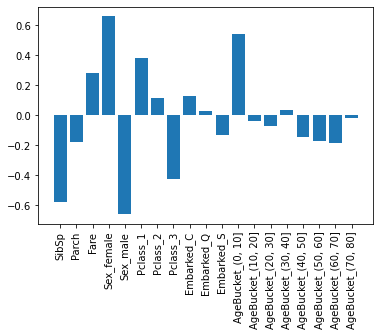

In [38]:
from matplotlib import pyplot as plt
plt.bar(x_test.columns, model.coef_.flatten())
plt.xticks(x_test.columns, rotation=90)

In [39]:
#Evaluation using confusion matrix


In [40]:
y_hat = model.predict(scaler.transform(x_test))

In [41]:
y_hat

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [42]:
list(zip(y_hat,y_test))

[(0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 1),
 

In [43]:
model.score(scaler.transform(x_test),y_test)

0.770949720670391

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_hat)

array([[90, 18],
       [23, 48]], dtype=int64)

In [45]:
from sklearn.metrics import precision_score, recall_score


In [46]:
precision_score(y_test,y_hat)

0.7272727272727273

In [47]:
recall_score(y_test,y_hat)

0.676056338028169

In [48]:
y_prob=model.predict_proba(scaler.transform(x_test))

In [49]:
y_prob

array([[0.91291081, 0.08708919],
       [0.08410842, 0.91589158],
       [0.06102715, 0.93897285],
       [0.87571404, 0.12428596],
       [0.77782719, 0.22217281],
       [0.12093315, 0.87906685],
       [0.88672142, 0.11327858],
       [0.90962032, 0.09037968],
       [0.89174949, 0.10825051],
       [0.78234428, 0.21765572],
       [0.91047153, 0.08952847],
       [0.05233965, 0.94766035],
       [0.71764075, 0.28235925],
       [0.64929599, 0.35070401],
       [0.05125299, 0.94874701],
       [0.87570584, 0.12429416],
       [0.91945878, 0.08054122],
       [0.91041215, 0.08958785],
       [0.31572308, 0.68427692],
       [0.53283368, 0.46716632],
       [0.5791658 , 0.4208342 ],
       [0.17096927, 0.82903073],
       [0.48860967, 0.51139033],
       [0.91228578, 0.08771422],
       [0.97358579, 0.02641421],
       [0.75742009, 0.24257991],
       [0.72359845, 0.27640155],
       [0.90976966, 0.09023034],
       [0.22343867, 0.77656133],
       [0.52462115, 0.47537885],
       [0.

In [50]:
#slicing and only getting the latter column
y_prob1 = y_prob[:,1]

In [51]:
y_prob1

array([0.08708919, 0.91589158, 0.93897285, 0.12428596, 0.22217281,
       0.87906685, 0.11327858, 0.09037968, 0.10825051, 0.21765572,
       0.08952847, 0.94766035, 0.28235925, 0.35070401, 0.94874701,
       0.12429416, 0.08054122, 0.08958785, 0.68427692, 0.46716632,
       0.4208342 , 0.82903073, 0.51139033, 0.08771422, 0.02641421,
       0.24257991, 0.27640155, 0.09023034, 0.77656133, 0.47537885,
       0.15039332, 0.88015759, 0.96394771, 0.69018411, 0.74205076,
       0.12371029, 0.95678201, 0.08966369, 0.12377023, 0.77340789,
       0.54850238, 0.6634218 , 0.59915517, 0.08701532, 0.08708919,
       0.12429416, 0.08700536, 0.59958941, 0.23641204, 0.23330252,
       0.93392176, 0.5955409 , 0.57448084, 0.08088008, 0.69020564,
       0.07356646, 0.14547495, 0.08701532, 0.14925444, 0.55485507,
       0.08708919, 0.24016571, 0.19819972, 0.08701532, 0.08708919,
       0.08301766, 0.14925122, 0.18082984, 0.58292159, 0.08708919,
       0.05656167, 0.15487259, 0.59940849, 0.53524737, 0.08778

In [52]:
from sklearn.metrics import roc_curve
tpr,fpr,t = roc_curve(y_test,y_prob1)

In [53]:
tpr,fpr,t

(array([0.        , 0.        , 0.        , 0.00925926, 0.00925926,
        0.00925926, 0.00925926, 0.01851852, 0.01851852, 0.02777778,
        0.02777778, 0.03703704, 0.03703704, 0.0462963 , 0.0462963 ,
        0.0462963 , 0.0462963 , 0.07407407, 0.07407407, 0.11111111,
        0.11111111, 0.12037037, 0.12037037, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.17592593, 0.17592593, 0.18518519,
        0.18518519, 0.2037037 , 0.2037037 , 0.21296296, 0.21296296,
        0.23148148, 0.23148148, 0.25      , 0.26851852, 0.27777778,
        0.28703704, 0.31481481, 0.41666667, 0.44444444, 0.46296296,
        0.47222222, 0.47222222, 0.49074074, 0.52777778, 0.56481481,
        0.58333333, 0.58333333, 0.59259259, 0.59259259, 0.62962963,
        0.64814815, 0.65740741, 0.65740741, 0.7037037 , 0.7037037 ,
        0.72222222, 0.81481481, 0.83333333, 0.85185185, 0.85185185,
        1.        ]),
 array([0.        , 0.01408451, 0.23943662, 0.23943662, 0.28169014,
        0.30985915, 0.3521

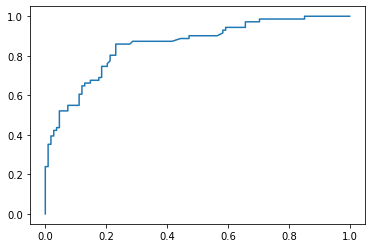

In [54]:
plt.plot(tpr,fpr)

In [55]:
#area under curve
from sklearn.metrics import auc
auc(tpr,fpr)

0.8560902451747523